In [1]:
] instantiate

In [2]:
using Arrow
using Clustering
using DataFrames
using FreqTables
using Plots
using Printf
using Statistics

In [3]:
df = DataFrame(Arrow.Table("sales.arrow"))
mat = Matrix(df)

52×811 Matrix{Float64}:
  0.369588    1.27724     -0.579404  …   0.571772  -0.594121  -0.438798
  0.640272    0.854207     0.790096     -0.571772  -0.594121   0.987295
  0.0989037  -0.414901    -0.237029     -0.571772  -0.594121  -0.438798
 -0.442464   -0.837937     0.105346     -0.571772   1.22319   -0.438798
  0.910956    1.27724      0.447721      0.571772  -0.594121  -0.438798
  0.640272   -1.26097     -0.237029  …   0.571772  -0.594121  -0.438798
  1.18164     0.854207    -0.579404      1.71532   -0.594121  -0.438798
  3.07643    -0.414901     1.47485       0.571772  -0.594121  -0.438798
 -0.983832   -0.414901     1.13247       0.571772   1.22319   -0.438798
  1.18164    -0.414901    -0.921779     -0.571772  -0.594121  -0.438798
  0.369588   -0.837937     1.81722   …  -0.571772  -0.594121  -0.438798
  1.18164    -0.837937     0.105346      0.571772  -0.594121  -0.438798
  1.72301     0.854207    -1.60653      -0.571772  -0.594121  -0.438798
  ⋮                                  ⋱  

In [4]:
mean_err = extrema(mean(mat, dims=1))

(-4.526293869625638e-16, 5.252208924188241e-16)

In [5]:
dev_err = extrema(std(mat, dims=1))

(0.9999999999999998, 1.0000000000000002)

In [6]:
clusters_kmpp = [kmeans(mat, numclusters, init=:kmpp) for numclusters in 2:20];

In [7]:
clusters_rand = [kmeans(mat, numclusters, init=:rand) for numclusters in 2:20];

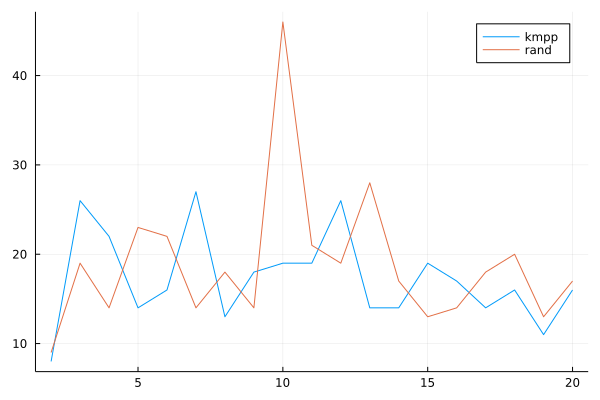

In [8]:
iterkmpp = [cl.iterations for cl ∈ clusters_kmpp]
iterrand = [cl.iterations for cl ∈ clusters_rand]
plot(2:20, iterkmpp, label="kmpp")
plot!(2:20, iterrand, label="rand")

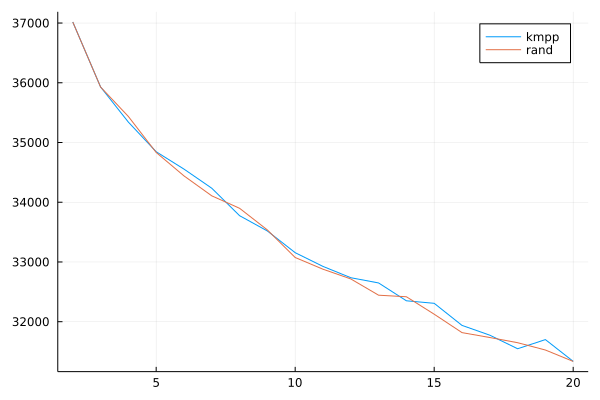

In [9]:
costkmpp = [cl.totalcost for cl ∈ clusters_kmpp]
costrand = [cl.totalcost for cl ∈ clusters_rand]
plot(2:20, costkmpp, label="kmpp")
plot!(2:20, costrand, label="rand")

In [10]:
elbow = 4
freqtable(clusters_kmpp[elbow].assignments, clusters_rand[elbow].assignments)

5×5 Named Matrix{Int64}
Dim1 ╲ Dim2 │   1    2    3    4    5
────────────┼────────────────────────
1           │  86    6   39   16    0
2           │   0    3    0    0  176
3           │  10  120    2   45   10
4           │ 101   22    1    4   31
5           │   1   23   78   37    0

In [11]:
four_clusters_vec_kmpp = [kmeans(mat, 4, init=:kmpp) for _ in 1:1000];

In [12]:
four_clusters_vec_rand = [kmeans(mat, 4, init=:rand) for _ in 1:1000];

In [13]:
cost_vec_kmpp = [cl.totalcost for cl ∈ four_clusters_vec_kmpp]
@info @sprintf "%.2f%%" std(cost_vec_kmpp) / mean(cost_vec_kmpp) * 100

┌ Info: 0.23%
└ @ Main In[13]:2


In [14]:
cost_vec_rand = [cl.totalcost for cl ∈ four_clusters_vec_rand]
@info @sprintf "%.2f%%" std(cost_vec_rand) / mean(cost_vec_rand) * 100

┌ Info: 0.24%
└ @ Main In[14]:2


In [15]:
best = if minimum(cost_vec_kmpp) < minimum(cost_vec_rand)
    four_clusters_vec_kmpp[argmin(cost_vec_kmpp)]
else
    four_clusters_vec_rand[argmin(cost_vec_rand)]
end
freqtable(best.assignments)

4-element Named Vector{Int64}
Dim1  │ 
──────┼────
1     │ 227
2     │ 212
3     │ 207
4     │ 165

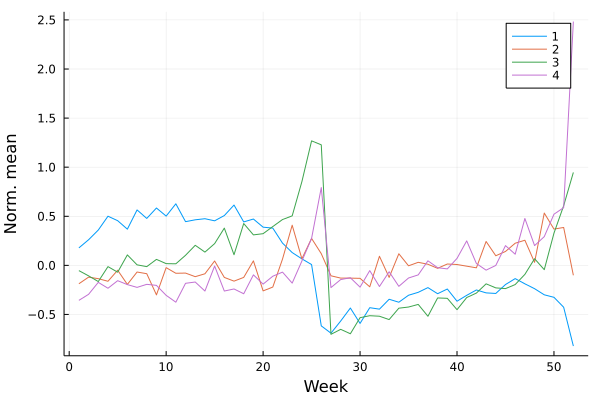

In [16]:
plot(mean(mat[:, best.assignments .== 1], dims=2), label="1", xlabel="Week", ylabel="Norm. mean")
plot!(mean(mat[:, best.assignments .== 2], dims=2), label="2")
plot!(mean(mat[:, best.assignments .== 3], dims=2), label="3")
plot!(mean(mat[:, best.assignments .== 4], dims=2), label="4")


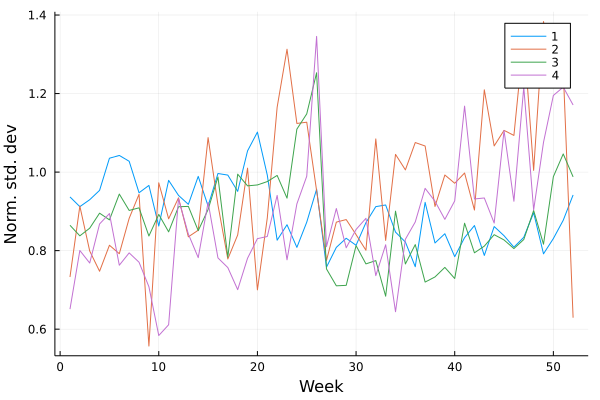

In [17]:
plot(std(mat[:, best.assignments .== 1], dims=2), label="1", xlabel="Week", ylabel="Norm. std. dev")
plot!(std(mat[:, best.assignments .== 2], dims=2), label="2")
plot!(std(mat[:, best.assignments .== 3], dims=2), label="3")
plot!(std(mat[:, best.assignments .== 4], dims=2), label="4")

In [18]:
open("cluster_assignments.txt", "w") do f
  foreach(asgn -> println(f, asgn), best.assignments)
end